<a href="https://colab.research.google.com/github/CoiferousYogi/L-T_Offline_Lecures/blob/main/L%26TDay1SessionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!pip install Gradio
import gradio as gr

In [3]:
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

In [4]:
df=pd.read_csv(path)

In [5]:
df=pd.read_csv(path,header=None)

In [6]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
175,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
24,1,148,dodge,gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229
137,2,104,saab,gas,turbo,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18620


### For this dataset we will change the column names first

In [7]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25],
      dtype='int64')

In [8]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [9]:
df.columns=headers

In [10]:
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
23,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957
92,1,122,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6849
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
80,3,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9959
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295


# Basic Questions about the data

In [11]:
# What are the dimensions of the data?
df.shape

(205, 26)

In [12]:
# 2 What does the data look like?
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
88,-1,137,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250
99,0,106,nissan,gas,std,four,hatchback,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,8949


In [13]:
# 3. What is the datatype of each feature?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [14]:
# 4. Are there any missing values?
df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [15]:
# 5. How does the data look like mathematically? (Summary Statistics)
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [16]:
# 6. Are there any duplicate values in the dataset?
df.duplicated().sum()

np.int64(0)

### Making a duplicate df to perform analysis

In [17]:
df1 = df.copy()

In [18]:
df1.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.40,101,6000,17,23,11845
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.70,?,?,23,31,9895
38,0,106,honda,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.00,86,5800,27,33,9095
132,3,150,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850
91,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.40,69,5200,31,37,6649


## Feature Engineering
### 1. Handling datatypes of features

In [19]:
df["normalized-losses"].isnull().value_counts()

,count
normalized-losses,
False,205


In [20]:
# Replace '?' with NaN before converting to float
for column in ["bore", "normalized-losses", "price", "peak-rpm", "stroke", "horsepower"]:
    df1[column] = pd.to_numeric(df1[column], errors='coerce')

In [21]:
df1[["bore"]] = df1[["bore"]].astype("float")
df1[["normalized-losses"]] = df1[["normalized-losses"]].astype("float")
df1[["price"]] = df1[["price"]].astype("float")
df1[["peak-rpm"]] = df1[["peak-rpm"]].astype("float")

df1[["stroke"]]=df1[["stroke"]].astype("float")
df1[["horsepower"]]=df1[["horsepower"]].astype("float")

### Handling Missing Values

In [22]:
avg1=df1['normalized-losses'].mean()
avg1

np.float64(122.0)

In [23]:
df1['normalized-losses'].replace(np.nan,avg1,inplace=True)

<ipython-input-23-58576e05eaa3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['normalized-losses'].replace(np.nan,avg1,inplace=True)


In [24]:
df1['normalized-losses']

,normalized-losses
0,122.0
1,122.0
2,122.0
3,164.0
4,164.0
...,...
200,95.0
201,95.0
202,95.0
203,95.0


In [25]:
df["normalized-losses"].isnull()

,normalized-losses
0,False
1,False
2,False
3,False
4,False
...,...
200,False
201,False
202,False
203,False


In [26]:
df["normalized-losses"].isnull().sum()

np.int64(0)

In [27]:
df1.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [28]:
df['num-of-doors'].value_counts()

,count
num-of-doors,
four,114
two,89
?,2


In [29]:
df['num-of-doors'].replace(np.nan,'four',inplace=True)

<ipython-input-29-d40d5c7ee598>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].replace(np.nan,'four',inplace=True)


In [30]:
df['num-of-doors'].isnull().sum()

np.int64(0)

In [31]:
df['num-of-doors'].value_counts()

,count
num-of-doors,
four,114
two,89
?,2


In [32]:
bore_mean = np.mean(df1['bore']).mean()
bore_mean

np.float64(3.3297512437810943)

In [33]:
df1["bore"].replace(np.nan,bore_mean,inplace=True)

<ipython-input-33-8a35152a9e77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["bore"].replace(np.nan,bore_mean,inplace=True)


In [34]:
df1['bore'].isnull().sum()

np.int64(0)

In [35]:
df1['stroke'].value_counts()

,count
stroke,
3.40,20
3.15,14
3.23,14
3.03,14
3.39,13
2.64,11
3.29,9
3.35,9
3.46,8


In [36]:
df1['stroke'].isnull().sum()

np.int64(4)

In [37]:
df1["stroke"].replace(np.nan,np.mean(df1["stroke"]),inplace=True)
df1["stroke"].isnull().sum()

<ipython-input-37-271f0714b0cf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["stroke"].replace(np.nan,np.mean(df1["stroke"]),inplace=True)


np.int64(0)

In [38]:
df1["horsepower"].replace(np.nan,np.mean(df1["horsepower"]),inplace=True)
df1["horsepower"].isnull().sum()

<ipython-input-38-ee71c6012eeb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["horsepower"].replace(np.nan,np.mean(df1["horsepower"]),inplace=True)


np.int64(0)

In [39]:
df1["peak-rpm"].replace(np.nan,np.mean(df1["peak-rpm"]),inplace=True)
df1["peak-rpm"].isnull().sum()

<ipython-input-39-e2db7f122f33>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["peak-rpm"].replace(np.nan,np.mean(df1["peak-rpm"]),inplace=True)


np.int64(0)

In [40]:
df1["price"].isnull().sum()

np.int64(4)

In [41]:
df1.dropna(subset=["price"],axis=0,inplace=True)

In [42]:
df1.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


### Normalizing the data

In [43]:
df1['length']=df1['length']/df1['length'].max()
df1['width']=df1['width']/df1['width'].max()

### Data Standardization

In [44]:
df1['city-L/100km'] = 235/df["city-mpg"]

In [45]:
df1['city-L/100km']

,city-L/100km
0,11.190476
1,11.190476
2,12.368421
3,9.791667
4,13.055556
...,...
200,10.217391
201,12.368421
202,13.055556
203,9.038462


In [46]:
df1["highway-L/100km"] = 235/df1["highway-mpg"]

In [47]:
df1.rename(columns={"num-of-doors":"doors"},inplace=True)

In [48]:
df1.to_csv('cleaned_car_data.csv')

### Training a ML Model

In [49]:
df=pd.read_csv('cleaned_car_data.csv')

# Making a linear regression model

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    float64
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   doors              201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [51]:
df.sample(5)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,doors,body-style,drive-wheels,engine-location,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
36,37,0,106.0,honda,gas,std,two,hatchback,fwd,front,...,3.15,3.58,9.0,86.0,5800.0,27,33,7895.0,8.703704,7.121212
185,189,3,122.0,volkswagen,gas,std,two,convertible,fwd,front,...,3.19,3.40,8.5,90.0,5500.0,24,29,11595.0,9.791667,8.103448
51,54,1,113.0,mazda,gas,std,four,sedan,fwd,front,...,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0,7.580645,6.184211
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
73,76,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,...,2.97,3.23,9.4,68.0,5500.0,37,41,5389.0,6.351351,5.731707


In [52]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [53]:
df.sample()

,symboling,normalized-losses,make,fuel-type,aspiration,doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
43,2,122.0,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,3.43,3.23,9.2,90.0,5000.0,24,29,11048.0,9.791667,8.103448


In [54]:
df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


### Linear Regression Model

In [55]:
# Making a numerical df for the regression prediction
df_num=df.select_dtypes(include=['float64','int64'])

### Correlation between the features

In [56]:
df_num.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089


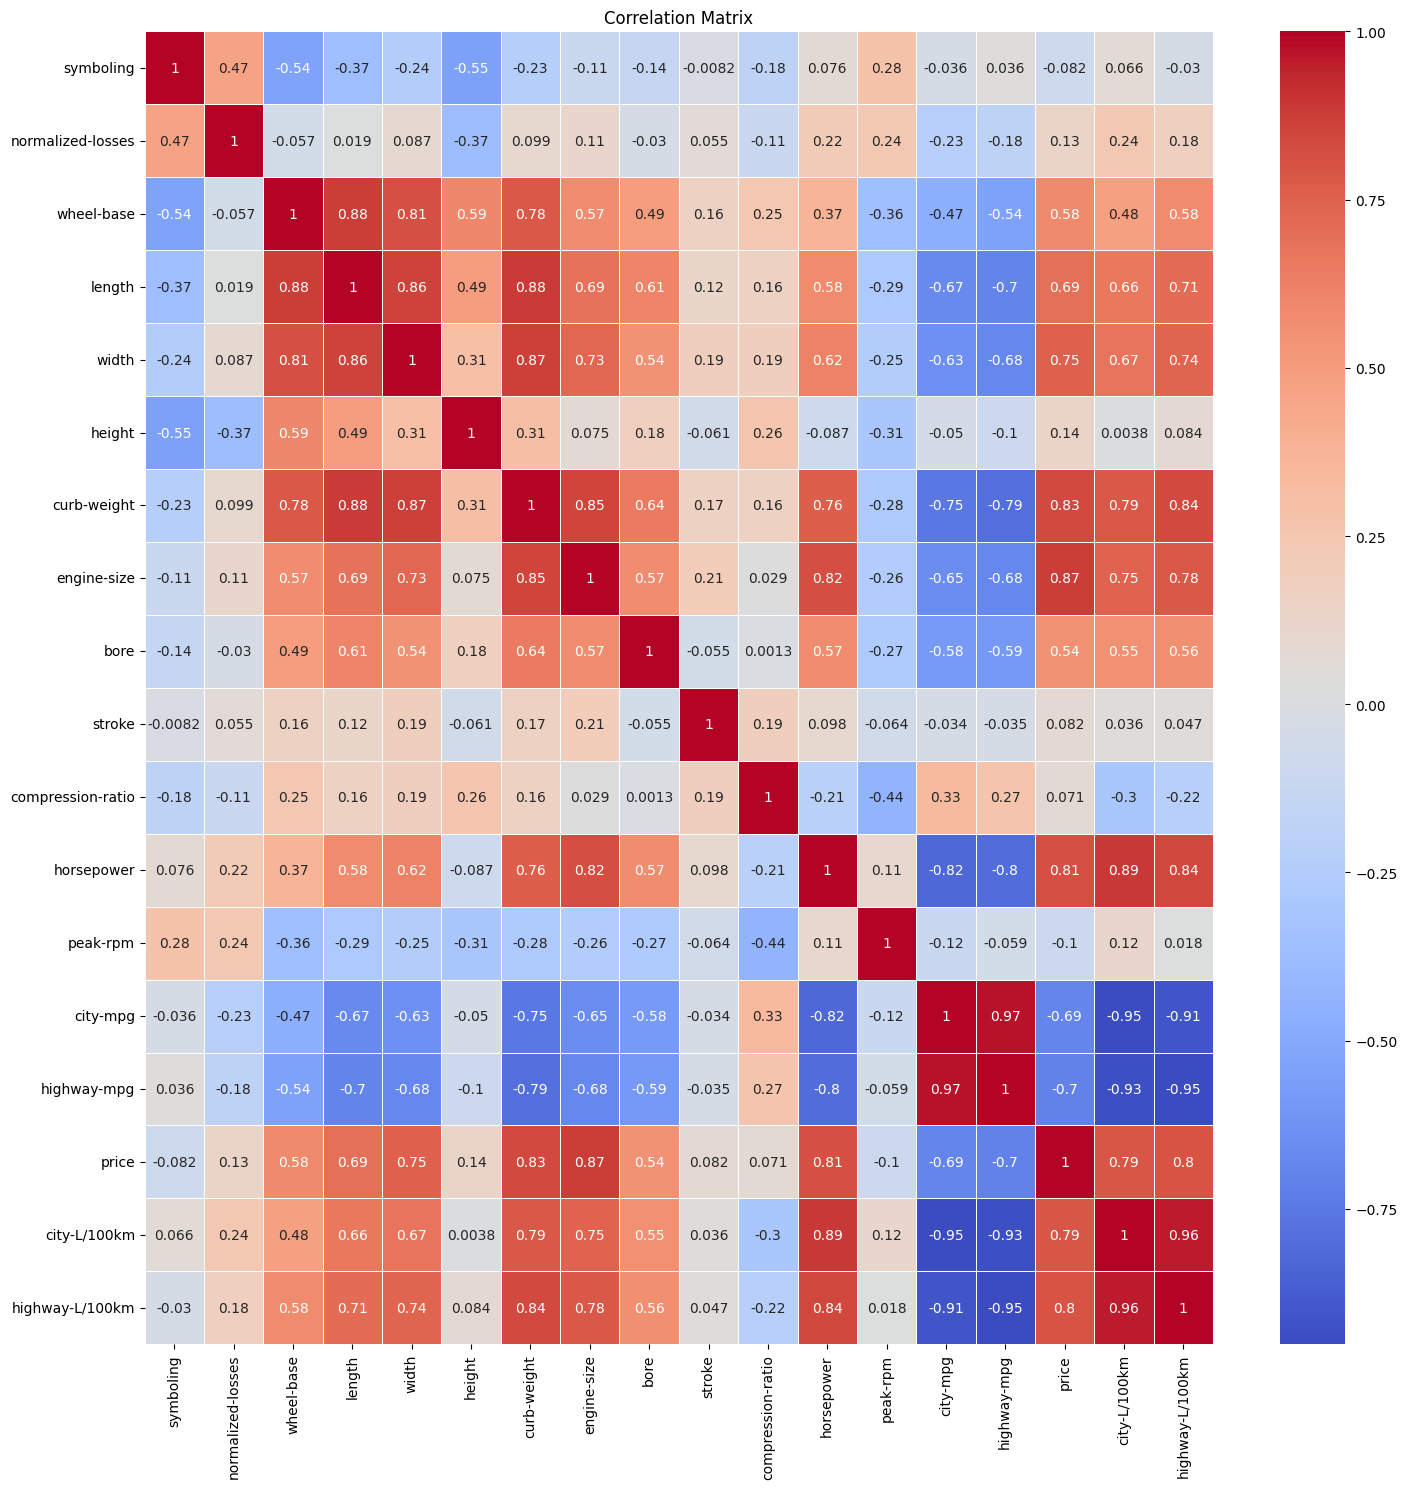

In [57]:
plt.figure(figsize=(15,15))
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
plt.savefig('correlation_matrix_numerical_vars_heatmap.png')
plt.close()

**From the heatmap it is clear that price has strong positive correlation with features such as wheel-base(0.58) length(0.69), width(0.75), curb-weight(0.83), engine-size(0.87), horsepower(0.81), city-L/100km(0.79) and highway-L/100km(0.8)**

**Price also shows positive correlation for features like symboling, normalized-losses, height, stroke, compression-ratio**

**Price shows negative correlation for features like symboling, city-mpg, highway-mpg**

In [58]:
X=df[["city-L/100km","highway-L/100km","horsepower","bore","engine-size","curb-weight","wheel-base","length","width"]]

In [59]:
Y=df['price']

### Training the model

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [62]:
X_train_df=np.asanyarray(X_train)
X_test_df=np.asanyarray(X_test)
Y_train_df=np.asanyarray(Y_train)
Y_test_df=np.asanyarray(Y_test)

In [63]:
from sklearn import linear_model
model= linear_model.LinearRegression()

In [64]:
model.fit(X_train_df,Y_train_df)

LinearRegression()

In [65]:
Y_pred=model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [66]:
Y_pred[0:5]

array([ 7116.891255  , 25683.39358385,  5849.51226893,  8095.32594551,
       13329.01760108])

In [67]:
Y_test[0:5]

,price
95,8249.0
15,41315.0
30,6855.0
158,9258.0
128,11850.0


### Regression Performance Metrics

In [68]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Mean Absolute Error

In [69]:
mae=np.mean(np.abs(Y_pred-Y_test))

In [70]:
mae

np.float64(3150.6643828269703)

#### Mean Square Error

In [71]:
mse=np.mean(np.abs(Y_pred-Y_test)**2)

In [72]:
mse

np.float64(22556233.267563075)

#### Root Mean Square Error

In [73]:
rmse=np.sqrt(np.mean((Y_pred-Y_test)**2))

In [74]:
rmse = np.sqrt(rmse)

In [75]:
rmse

np.float64(68.91545761396925)

In [76]:
def evaluate_model(model, name):
  #If the model is the polynomial regression model, use X_poly_test for prediction
    if name == "Polynomial Regression":
        Y_pred = model.predict(X_poly_test)  # Use transformed test data for polynomial regression
    else:
        Y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(f"R2 Score: {r2_score(Y_test, Y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred)):.2f}")
    print(f"MAE: {mean_absolute_error(Y_test, Y_pred):.2f}")


In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

ct = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='mean'), numerical_features),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse=False for Linear Regression
    ],
    remainder='passthrough'
)

pipeline_lr = Pipeline([
    ('transformer', ct),
    ('regressor', LinearRegression())
])

pipeline_lr.fit(X_train, Y_train)

evaluate_model(pipeline_lr, "Linear Regression")


Linear Regression
R2 Score: 0.7620
RMSE: 4749.34
MAE: 3150.66


In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a ColumnTransformer to apply SimpleImputer to numerical features and OneHotEncoder to categorical features
ct = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='mean'), numerical_features),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse=False for RandomForestRegressor
    ],
    remainder='passthrough'
)

# Create a pipeline with the ColumnTransformer and RandomForestRegressor
pipeline_rf = Pipeline([
    ('transformer', ct),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, Y_train)

evaluate_model(pipeline_rf, "Random Forest Regressor")


Random Forest Regressor
R2 Score: 0.9260
RMSE: 2648.55
MAE: 1699.69


In [79]:
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a ColumnTransformer to apply transformations to different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),  # Apply StandardScaler to numerical features
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),  # Apply OneHotEncoder to categorical features
    ])

# Create a pipeline with preprocessing and SVR
pipeline_svr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=100)),
])

# Fit the pipeline to the training data
pipeline_svr.fit(X_train, Y_train)

# Evaluate the model (assuming you have an evaluate_model function)
evaluate_model(pipeline_svr, "Support Vector Regressor")


Support Vector Regressor
R2 Score: 0.0757
RMSE: 9360.09
MAE: 5338.50


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load the dataset
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df=pd.read_csv(path)

# Define the column names
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

df.replace("?",np.nan, inplace=True)

# Convert specific columns to numeric
for column in ["bore", "normalized-losses", "price", "peak-rpm", "stroke", "horsepower"]:
    df[column] = pd.to_numeric(df[column], errors='coerce')

avg1=df['normalized-losses'].mean()
df['normalized-losses'].replace(np.nan,avg1,inplace=True)

df['num-of-doors'].isnull().sum()
df['num-of-doors'].replace(np.nan,'four',inplace=True)

x=np.mean(df["bore"])
df["bore"].replace(np.nan,x,inplace=True)

df["stroke"].replace(np.nan,np.mean(df["stroke"]),inplace=True)

df["horsepower"].replace(np.nan,np.mean(df["horsepower"]),inplace=True)
df["peak-rpm"].replace(np.nan,np.mean(df["peak-rpm"]),inplace=True)

df.dropna(subset=["price"],axis=0,inplace=True)

X=df[["horsepower","bore","engine-size","curb-weight","wheel-base","length","width"]]
Y=df['price']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

X_train_df=np.asanyarray(X_train)
X_test_df=np.asanyarray(X_test)
Y_train_df=np.asanyarray(Y_train)
Y_test_df=np.asanyarray(Y_test)

from sklearn import linear_model
model= linear_model.LinearRegression()
model.fit(X_train_df,Y_train_df)

Y_pred=model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mae=np.mean(np.abs(Y_pred-Y_test))
mse=np.mean(np.abs(Y_pred-Y_test)**2)
rmse=np.sqrt(np.mean((Y_pred-Y_test)**2))
rmse = np.sqrt(rmse)

def evaluate_model(model, name):
  #If the model is the polynomial regression model, use X_poly_test for prediction
    if name == "Polynomial Regression":
        Y_pred = model.predict(X_poly_test)  # Use transformed test data for polynomial regression
    else:
        Y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(f"R2 Score: {r2_score(Y_test, Y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, Y_pred)):.2f}")
    print(f"MAE: {mean_absolute_error(Y_test, Y_pred):.2f}")


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['number']).columns

ct = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='mean'), numerical_features),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse=False for Linear Regression
    ],
    remainder='passthrough'
)

pipeline_lr = Pipeline([
    ('transformer', ct),
    ('regressor', LinearRegression())
])

pipeline_lr.fit(X_train, Y_train)

evaluate_model(pipeline_lr, "Linear Regression")

def predict_car_price(normalized_losses, wheel_base, engine_size, bore, stroke, compression_ratio, horsepower, peak_rpm):
  input_data=np.array([[normalized_losses, wheel_base, engine_size, bore, stroke, compression_ratio, horsepower, peak_rpm]])
  prediction=model.predict(input_data)
  return prediction(0)


# Creating an interface with Gradio
#!pip install Gradio
#import gradio as gr

iface = gr.Interface(
    fn=predict_car_price,
    inputs=[
        gr.Number(label="Normalized Losses"),
        gr.Number(label="Wheel Base"),
        gr.Number(label="Engine Size"),
        gr.Number(label="Bore"),
        gr.Number(label="Stroke"),
        gr.Number(label="Compression Ratio"),
        gr.Number(label="Horsepower"),
        gr.Number(label="Peak RPM"),
    ],
    outputs=gr.Number(label="Predicted Car Price"),
    title="Car Price Prediction",
    description="Enter the required features to predict the car price."
)

iface.launch()



<ipython-input-85-70fe31dca57b>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].replace(np.nan,avg1,inplace=True)
<ipython-input-85-70fe31dca57b>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)


Linear Regression
R2 Score: 0.8279
RMSE: 3947.26
MAE: 2872.39
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5fa16ddeac0f637854.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [86]:
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
142,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,...,108,mpfi,3.62,2.64,9.0,94.000000,5200.000000,26,32,9960.0
183,2,94.0,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52.000000,4800.000000,37,46,7995.0
130,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,104.222772,5125.990099,23,31,9895.0
95,1,122.0,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69.000000,5200.000000,31,37,7499.0
182,2,122.0,volkswagen,gas,std,two,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85.000000,5250.000000,27,34,7975.0


In [87]:
pd.set_option("display.max_columns", None)
df.sample(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
164,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,64.0,52.6,2265,dohc,four,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
148,0,85.0,subaru,gas,turbo,four,wagon,4wd,front,96.9,173.6,65.4,54.9,2650,ohcf,four,108,mpfi,3.62,2.64,7.7,111.0,4800.0,23,23,11694.0
183,2,94.0,volkswagen,diesel,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2264,ohc,four,97,idi,3.01,3.40,23.0,52.0,4800.0,37,46,7995.0
